# What I need from you...

Congratulations! You probably just opened the most interesting Jupyter Notebook ever.

This Notebook is the result of many hours of hard work. 
And, I need something in return. From you. 

<video src="videos/Minions.mp4" width="280" height="157.5" type="video/mp4" controls>
Your browser does not support the video tag
</video> 

[[d]](#d) 
 
I created this Notebook as part of my bachelor thesis project. An evaluation of this Notebook is part of the thesis. This is why I need you to fill out a questionaire. 

**Duration to fill out questionaire:** A minimal evaluation takes 3 mouse clicks. In addition, if you wish to give a more detailed feetback, you can also answer the open questions. Any feedback will be very much appreciated. Answers can be in English or in German. 

<img src="figures/phone1.jpg" width="500"  alt="If 115 Students read this Notebook, I would need each one of them to fill out my questionaire at least 7.429 times in order to get significant results...">

Please fill out the form before the \<date\>. You can find the questionaire through this link: ...

Thank you soooo much for your help! I hope the material presented here will help you.

In [1]:
%run topsecret/test1.ipynb


I promise, I will fill out the questionaire before the due date ! 

confirm with yes or no: 


 yes



Nice, thank you so much!


## Introduction

Why are you looking at this notebook right now? I assume it is because you are learning about parallel programming and want to know all about it. But why is that so? Why are you bothering about learning the skill of parallel programming?

<img src="figures/happyman.jpg" width="400"  alt="I always wanted to be able to say 'I once too took a course in parallel programming'...">

Well, probably you are aware of the importance of creating code with good performance, and you hope that parallel programming will help you with this. According to [[a]](#a) the main reason why we do parallel programming is to increase performance.

But what is performance ? And to what extend can parallel programming help us increase performance ?

When learning about parallel programming it is crucial to understand what performance is, how we can measure it, ... 

In this Notebook you will learn about:

- [Why we Need Parallel Programming](#why)
- [Speed up](#speedup)
- [Efficiency](#efficiency)
- [Measuring Elapsed Time](#measuring)
- [Calculating $t_{serial}$](#calculating)
- [Overhead](#overhead)
- [Amdahl's Law](#amdahl)
- [The serial fraction of a program](#serialfraction)
- [Scalability](#scalability)
- [Gustafson's Law](#gustafson)
- [Summary](#summary)
- [References](#references)

This notebook is not a more complicated version of a textbook, but a tool for interactive learning instead. You can write and execute your own code in code cells, and adjust the values of parameters I have defined in my code. You will not only learn about different laws of performance but will also be able to test the validity of these laws yourself. There are a number of benchmarks for this purpose, that you can find in the home-folder of this notebook. Of course you can also write your own serial and parallel programs and test their performance within this notebook. 

Have fun!!!

## Why we need Parallel Programming <a class="anchor" id="why"></a>

With the use of parallel programming we can not only speed up our programs, but we can also use the increased performance to reduce power consumption [[b]](#b):

In this notebook we will not analyze the improvement of performance with regards to power consumption. Nevertheless, I recommend watching the following video by Tim Mattson [[c]](#c). He will talk about why we need parallel programming, and how parallel programming is influencing not only speed but also power consumption. This is the link: https://youtu.be/cMWGeJyrc9w.

What did we learn from Tim Mattson in this video?

We learned that with parallel computing we can either:
1. Execute a program in the same amount of time, but with reduced power consumption 
2. or execute a program with the same amount of power consumption, but with reduced execution time

In the following sections we will only evaluate performance with regards to execution time. Keep in mind, however, that whenever you are able to reduce execution time, it means that there is also potential to reduce power consumption instead [[n]](#n).

## Speed Up <a class="anchor" id="speedup"></a>

The term 'speed up' is used to describe how much faster a new version of a program runs compared to the old version. This implies that we have 2 different execution times that we compare. In the case of parallel programming, it makes sense to compare 
- the execution time 'without parallelism' 
- the execution time 'with parallelism'

Thus the speed up gives us a measurement for the improvement in speed that was achieved by applying parallelism to a program. 

We use the following formula to calculate speed up [[e]](#e):

**Speed up = $\frac{t_{serial}}{t_{parallel}}$**

> $t_{serial}$ = execution time of the serial program, i.e. the program that does not use parallelism
> <br>$t_{parallel}$ = execution time of the parallelized program 

**Question:**
> Assume we have a serial program, that has an execution time of 54 seconds. Now we apply parallelism to our program. When we measure the execution time again, it is 27 seconds. 

> What speed up did we achieve ? 

In [2]:
%run topsecret/test2.ipynb

My answer:


 2



That's right!
Because 54/27=2 we have a speed up of two. This means, that the parallel version of the programm runs two times as fast than the serial one.


<br><br>
<img src='figures/race3.jpg' width='600' art='picture to illustrate speed up'>

Another commonly used measurement for performance is 'efficiency'. 

## Efficiency <a class="anchor" id="efficiency"></a>

Imagine you would try to fill up a truck with sand, and you share this task with 2 other friends. Probably you would more or less be able to do the task 3 times faster compared to doing it alone. So speed-up is 3. But what if you try to share the work with 300 of your friends? Would you be 300 times as fast? Probably not, because it would get rather chaotic and your friends would just be in the way of each other. Thus, your friends won't be able to work as efficiently as they would if there were less. 

Efficiency gives us a measurement for how much each processor is contributing to the speed-up. In most cases the efficiency reduces as the number of processors increases. This intuitively makes sense, if we think about the 'filling a truck with sand' example I just gave. 

This is the formula for efficiency [[a]](#a):

>Efficiency $ = \frac{Speed-up}{p} = \frac{\frac{t_{serial}}{t_{parallel}}}{p} = \frac{t_{serial}}{p \cdot t_{parallel}}$


**Question:** Filling a truck with sand all by yourself, you need 6 hours. If you have 23 friends helping you, it takes only 30 minutes. With what efficiency can you load the truck with sand, if you have a team of 24 people (including you) ? 

In [ ]:
%run ./topsecret/test15.ipynb

As you can see, calculating the speed up and the efficiency is pretty straight forward. There are, however, a few questions you need to ask yourself: 

   > [1. How can you measure the execution time ?](#1)<br>
   > [2. Is it enough to measure the execution time just one time?](#2)<br>
   > [3. How can you measure the execution time of a executable program from within Jupyter Notebook?](#3)<br>
   > [4. Should you measure the execution time of the full pogramm run, or just a part of it?](#4)<br>

In the following Section we will answer these 4 questions one by one.

## Measuring Elapsed Time <a class="anchor" id="measuring"></a>

### 1. How to measure execution time <a class="anchor" id="1"></a>

In Jupyter Notebooks we can use the magic command `%%time` to measure the execution time of a code cell. Let's look at this example (the Code is in Python):

In [2]:
%%time
a = 2
while a<100:
    a *= 5

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 7.87 µs


As a result we get CPU time and Wall time. Do you know the difference? 

`CPU time` measures the total time during which the CPU was busy executing our code, including time spent in library functions. The `wall time` on the other hand also measures the time, during which our program was idle. Wall time measures 'the time that has elapsed between the start and finish of execution of the code' [[a]](#a).

**Question:** Which one do you think you need to measure, if you want to evaluate the performance of your parallel program?

In [5]:
%run topsecret/test3.ipynb

Write 'CPU Time' or 'Wall Time':


 sda


You did't type a valid answer. Write 'CPU Time' or 'Wall Time'.


**Example:** 
"For example, in a distributed-memory program, a process that calls a receive function may have to wait for the sending process to execute the matching send, and the operating system might put the receiving process to sleep while it waits. This idle time wouldn't be counted as CPU time, since no function that's been called by the process is active. However, it should count in our evaluation of the overall run-time, since it may be a real cost in our program. If each time the program is run, the process has to wait, ignoring the time it spends waiting would give a misleading picture of the actual run-time of the program " [[a]](#a).

### 2. How many times do you have to run the code?<a class="anchor" id="2"></a>

**Challenge:** Run the code cell above (the one starting with %%time) multiple times. What do you observe ?

You probably noticed that the wall time and CPU time differ each time you run the code. Since many other things are happening on the system while the code is executed, the exact values for CPU and wall time will differ each time we run the code. 

The following code will give you a graphical illustration of this effect. Note, that in the code below we measure the wall time without the help of the `%%time` magic command. This allow us to save the result of one single measurement multiple times, which we can then plot into a histogram. 

**Hint:** You can replace my code within the commented section with your own code if you want to graphically display the variance in wall time measurements. Should your code not be in Python, then you can make an executable of it instead, place the file in the same folder you have this notebook at, and replace my code with <br>`! ./nameOfYourBinary`. 

Text(0.5, 0, 'micro seconds')

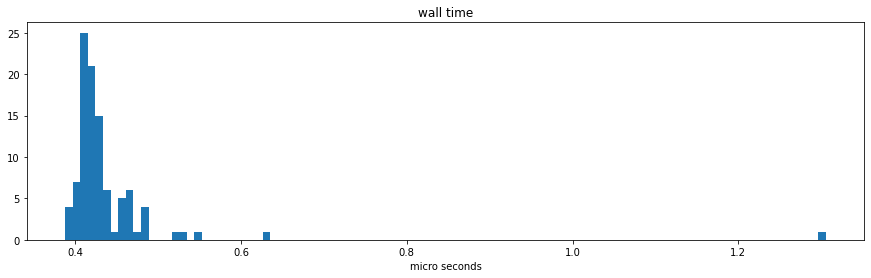

In [2]:
import timeit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

seconds = 1
miliSeconds = 1e3
microSeconds = 1e6
nanoSeconds = 1e9

#start of constants you might want to adjust
timeUnit = microSeconds #determines the time Unit on the x axis of the histogramm
label = 'micro seconds' #this should be the same as the chosen timeUnit 
iterations = 100 #amount of measurements
#end of constants you might want to adjust

times = np.zeros(iterations)
binsInHistogramm = iterations #amount of containers in the Histogramm
 

for x in range(iterations):
    time1 = timeit.default_timer()

#start of the code you want to measure execution time on'''
    a = 2
    while a<100:
        a *= 5
#end of the code you want to measure execution time on'''

    time2 = timeit.default_timer()
    times[x]=(time2-time1)*timeUnit

#display histogramm
fig,ax = plt.subplots(figsize=(15,4))
ax.hist(times, bins=binsInHistogramm)
ax.set_title('wall time')
ax.set_xlabel(label)

Each time you rerun the code, the histogram will look different. However, probably you notice one single value at the very right, each time you run the code. This makes it difficult to interpret the histogram values. 

**Question:** Do you think this is just random? Or could there be a good reason for this behavior?

To answer this question, let's look at the first 20 values of our measurements:

In [3]:
if np.size(times)>=20:
    print(times[:20])
else: print(times)

[1.30571425 0.62771142 0.54761767 0.52340329 0.48428774 0.46938658
 0.46007335 0.46752393 0.48428774 0.461936   0.48056245 0.45262277
 0.46566129 0.46938658 0.48056245 0.46566129 0.45076013 0.47311187
 0.45634806 0.42282045]


Probably the first value is much higher than the following ones. This makes sense, because the first time we run the code data has to be first loaded into the cache. 

Let's discard the first measurement and look at our histogram again:

Text(0.5, 0, 'micro seconds')

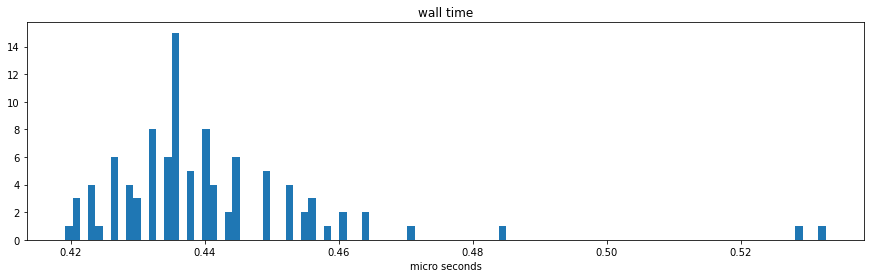

In [4]:
seconds = 1
miliSeconds = 1000
microSeconds = 1000000
nanoSeconds = 1000000000

#start of constants you might want to adjust
timeUnit = microSeconds #determines the time Unit on the x axis of the histogramm
label = 'micro seconds' #this should be the same as the chosen timeUnit 
iterations = 100 #amount of measurements
#end of constants you might want to adjust

times = np.zeros(iterations) 
binsInHistogramm = iterations #amount of containers in the Histogramm

for x in range(iterations):
    time1 = timeit.default_timer()

#start of the code you want to measure execution time on'''
    a = 2
    while a<100:
        a *= 5
#end of the code you want to measure execution time on'''

    time2 = timeit.default_timer()
    times[x]=(time2-time1)*timeUnit

#display histogramm
fig,ax = plt.subplots(figsize=(15,4))
ax.hist(times[1:], bins=binsInHistogramm)
ax.set_title('wall time')
ax.set_xlabel(label)

This histogram looks much better for analysis. 

**Question**: Let's say you want to give one single value for the speed of your program/code section. Which value would you choose? The smallest? The biggest? An average? Would you include very large/small values when calculating the average? 

In [5]:
%run topsecret/test4.ipynb

Which value would you choose? 

Type 'smallest','largest' or 'average': 



You did't type a valid answer.


What about the number of iterations? How many times should you measure the wall time on your code, to avoid random noise?

In [8]:
%run topsecret/test5.ipynb

How many iterations would you perform? 

Type a positive integer:



 20


If you just need an aproximate estimate, that will do the job. For a more exact result you probably want to increase the number of iterations.


<br>Let's try a few `number of iterations` and plot the results. For iteration number x we measure the wall time x times, and save the smallest measurement.

**Hint:** You could replace my code within the commented section with your own code.

In [15]:
iterations = [10,100,1000,10000,100000,1000000,10000000]
results = []

for i in iterations:
    result = np.zeros(i)
    for x in range(i):
        time1 = timeit.default_timer()

    #start of the code you want to measure execution time on'''
        a = 2
        while a<100:
            a *= 5
    #end of the code you want to measure execution time on'''

        time2 = timeit.default_timer()
        result[x]=(time2-time1)*1000000 #micro-seconds
    results.append(result.min())

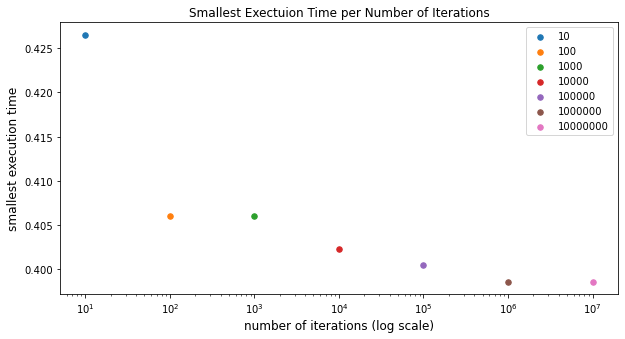

In [16]:
#plot results
fig,ax = plt.subplots(figsize=(10,5)) 
for i in range(len(iterations)):
    ax.scatter(iterations[i], results[i], s=30, label=iterations[i])
ax.set_xlabel('number of iterations (log scale)', fontsize=12)
ax.set_ylabel('smallest execution time', fontsize=12)
ax.set_title('Smallest Exectuion Time per Number of Iterations')
ax.semilogx()
ax.legend()

The more often you run the code, the more likely you will get a measurement during which the system is not very busy doing other things. As we can see in the plot above, whether you run the code 10 times or 10'000 times can make a big difference. At some point though, the benefit you get from further increasing the number of iterations will become insignificant. When exactly that point is reached depends on: 
- the system
- the background work happening on the system
- the code 

When I run the code above on my system, it looks like after 1 million iterations there is no significant improvement for the minimal execution time. The python module timeit by default also makes 1 million measurements [[e]](#e) [[g]](#g), so this seems to be a good standard practice. For code that is more time consuming you might have to adjust the number of iterations for practical reasons.

<img src='figures/thinking3.jpg' width='400' art='"I could measure the execution time of my serial programm while doing a lot of things in the background. Then when I measure the execution time of my parallel programm, I could minimize the work happening in the background. This could significantly increase my speed-up..."'>

When you want to compare the execution times of different programs (such as a serial and a parallel version) it is obviously necessary, that you measure both execution times on the same system and with similar amount of background work happening on the system. There are multiple ways of how one could influence the measurements and thus distort the calculations of speed up. If you are interested in this topic, I recommend you read the following article "Misleading Performance Reporting in the Supercomputing Field" by David H. Bailey [[f]](#f).

You might have noticed, that the wall time that we measured in the beginning with the magic command `%%time` differs from the time we measured manually with the use of `timeit.default_timer()`. 

### 3. How to measure execution time of a external program? <a class="anchor" id="3"></a>

There are many different ways of measuring the wall time, and each methods will give slightly different results. The explanation for this is `overhead`. We will talk more about overhead later. Some functions will also by default make multiple measurements of the execution time, and output the acumulated time of all repeats. As long as you are consistent with the method you use for measuring time, it doesn't matter so much which one you choose.

**Timeit Magic Command:** The probably most used method to measure execution time in Jupyter Notebooks is with the built-in magic command `timeit`. You might want to play around with the following options [[h]](#f):

- -o allows you to save the `TimeitResult` object. This also gives you the chance to access some interesting attributes of the TimeitResult object 
- -q silences the output
- -r sets the number of repeats
- -n sets the number of loops for each repeat

Maybe you feel confused about the difference between repeats and loops (I was). Just think of loops as 'repeats during each repeat'. In each repeat the code is executed n times (n=number set for loops), and the accumluated time measurement value of all loop runs is saved for every repeat. When you call the attribute `all_runs` you get the accumulated loop times for each 'repeat'. If you want to get the smallest non-accumulated time that was measured in all individual runs, you can use the attribute `best`.

**Example:** To give an example, we are going to run a paralized sorting program written in c, and measure the total execution time with `%timeit`. You can find the code for this progam in `./extras/programs/quicksort`. The program is sorting an array of 10'000 random numbers with the quicksort algorithm, using 8 threads. We pass the number of threads to be used as the first argument, and the length of the array to be sorted as the second argument. The option `>/dev/null` silences the output of the program in the terminal. 

In [18]:
time = %timeit -o -n 3 -r 9 -q ! ./programs/quicksort/notiming.o 64 10000 >/dev/null

**Question:** How many times did we run the program?

In [7]:
%run ./topsecret/test6.ipynb

Type a number:


 seventy



Sorry, that is not correct. The option n tells us how many times the code is run during each repeat. The option r tells us how many repeats we have. Try again...


**Question:** Out of all these program runs, what is the value of the fastest run we measured? What code do you have to run to find out?

In [19]:
%run ./topsecret/test7.ipynb

Type the code you would run, to find out the smallest execution time?


 time.best



Very Good!!!




### 4. Do we want to measure the execution time of the entire program ? <a class="anchor" id="4"></a>

In the method we used so far to measure the execution time of a program, we measured the time of the entire program run. Time consuming tasks that we might not necessarily want to include in our measurements are:
- loading the program
- loading runtime libraries
- initializing data
- allocating memory
- testing if the calculated solution is correct
- output of the result
- ect.

Be aware, that measuring execution time on the entire program is not standard practise [[a]](#a)! 

So how is it usually done? Well...different programmers do different things. Some will start measuring execution time right before the parallel region is entered and stop immedietly after the parallel region is left. Others will start timing when a function containing the main algorithm (e.g.Quicksort Alrgorithm) is entered, and stop timing upon return from this function. In both of these two scenarios data is usually initialized and memeory allocated before the timing phase begins, and any output or error testing will happen after the timing phase has stopped. 

In the folder `./programs` you can find various programs, that we will use to evaluate speed-up, efficiency, and laws of performance (Amdahl's law and Gustafson's Law). Each algorithm that you can find there has two different implementation versions. 

1. The parallel algorithm without any program internal time measuing 
2. The same parallel algorithm, but measuing the execution time spend during the parallel algorithm itself.

With the second option we don't measure the time for loading the program and runtime libraries, as well as the initialization of data, output of the program, validation of the solution, etc. All the binaries of the first option are called `notiming.o`, whereas the binaries of the second option are called `timing.o`.

Passed arguments for the `notiming.o` programms are: 1.Number of threads that should be used in the parallel regions, 2.Arguments for the Algorithm (e.g list length for soriting algoirhtms). Passed arguments for the `timing.o` programs are: 1. Number of threads, 2. Number of Repeats, 3. Arguments for the algorithm. The `timing.o` versions will save the smallest measured execution time in a text file called `time.txt`. The programs also work without passing any arguments, since there are default values set for all of them. 

Let's do a quick comparison of the execution times we get, depending on which program version we use. Here we have to make sure, that we use the same amount of repeats for each version. For the `notiming.o` version we set the number of repeats by setting the %timeit parameter `r` to the number of repeats we want. The `timing.o` versions take the number of repeats as the second argument when running it in the terminal.

The graphics below display the difference of time measurment and speed up for the calculation of the Mandelbrot set. You can find the code for the graphics at `./extras/compare_timemeasuring_methods`. In this extra Notebook you can very easily create analog graphics for any algoirthm in the `./programs` section, even for your own programs if you add them (see `./readme.txt` file for details). 

<img src='figures/compare1.PNG' width='900' art='"compare execution times of two different measuring methods."'>

For both time mesuring options we see a simillilar trend: the more threads we have, the faster runs the program/algorithm. Further, the benefit from further increasing the number of threads seems to get smaller as the thread number increases. We will talk more about his in the section about Amdahl's law.

If we don't pay much attention to the numbers on the y-axis we might think that we get more or less the same results. Be careful here, a more detailed analiyzis can change this first impression. 

Let's directly compare the absolute executions times:

<img src='figures/compare2.PNG' width='450' art='"compare execution times of two different measuring methods."'>

It looks like the overhead we get from running the full program instead of only the algorithm is roughly the same for all thread numbers, with a slight increase as the thread number gets bigger. 

Since we are interessted in speed up and how different factors such as thread number and problem size (more about this later) influence speed-up, we should also look at the speed up calculations:

<img src='figures/compare3.PNG' width='900' art='"compare execution times of two different measuring methods."'>

Well that is very interessting! On the two graphics further above we got the impression that we get more or less the same picture, regardless of which time measuring method we use. When we calcualte the speed up, however, we can see 2 things:
1. The speed-ups we get, if we only measure the execution time on the algorithm, are much higher.
2. The two curves have a different shape. On the left graph we can observe, that with the increased number of threads, the additional speed up gets smaller and smaller, and eventially plataoes. On the right graph we can also see a plateoing of the curve, this seems to be happening at a much higher number of threads however.

Let's also directly compare the speed-ups:

<img src='figures/compare4.PNG' width='450' art='"compare execution times of two different measuring methods."'>

We observe see very different calculations results for speed-up. This holds espcially true, as the number of thread increases. It seems surprising, that there could be such a big difference. This really shows, how easily we can influence the calculations of speed-up by adjusting how we measure time. It is thus important to have a critical mindset when reading about other researchers results regarding speed-up. 

Further we need to keep in mind, that we did all the calculations with only 10 repeats. As we have already found out earlier, this does not reduce random noise very much and thus gives us only approximate results (which is ok, if we are just exploring things and not writting a research paper...).

**Possible add on** How does different number of repeats influence speed up...

For the rest of this notebook we will measure only the elapsed time of the algorithm, and not the elapsed time of the entire program. This also allows us to increase the number of repeats (because it is faster) and thus get more precise results.   

## Calculating $t_{serial}$  <a class="anchor" id="calculating"></a>

Let's say we have some algorithm, for example the bubblesort algorithm for sorting a list of integers, and we wish to make it faster. What an excellent opportuniy to apply what we have learned about parallel programming. After parallelizing the selectionsort algorithm, we wish to examine the speed-up that we achieved. 

As a quick reminder, speed up is calculated like this:

Speed up = $\frac{t_{serial}}{t_{parallel}}$

- To calculate $t_{parallel}$ we simply measure the time spent in the parallelized mergesort function

- What about $t_{serial}$? You might think this is a question with an obvious answer: of course you would just take the serial version of your mergesort function, and measure the execution time. 

Let's have a look at the speed-up that we can achieve by calculating it this way. We are going to sort a list of 1'000 random numbers and set repeats to 100 and thread number set to 8 in the parallel program.

In [28]:
%cd ~/work/Thesis/programs/bubblesort
! ./timing.o 8 100 1000 >/dev/null
time_parallel_bubblesort = np.genfromtxt('./time.txt')
! ./timing.o 1 100 1000 >/dev/null
time_serial_bubblesort = np.genfromtxt('./time.txt')
print("\nSpeed up of Bubblesort with 8 Threads:")
print(time_serial_bubblesort/time_parallel_bubblesort)

/home/jovyan/work/Thesis/programs/bubblesort

Speed up of Bubblesort with 8 Threads:
2.156883116883117


As we can't wait all day, we ran the code only 100 times. This means that the speed-up we end up calculating can vary quite a bit, if we run the code cell above multiple times. 

The speed up I got when I ran the cell was 2.15.

So that's it, pretty easy and straight forward, right? 

**picture**teacher womean saying "It looks easy, but you could make it much more complicated..."

One could argue, that $t_{serial}$ should be measured with the best possible algorithm for a specific problem. There are many sorting algorithms, and the fastest one for our specific list of numbers might not necessarily be selectonsort. Quicksort and Mergesort  are other sorting algorithms, which could be more efficient for aour specific problem. Let's compare the performance of these other sorting algorithms (serial version):

In [23]:
%cd ~/work/Thesis/programs/bubblesort
! ./timing.o 1 100 1000 >/dev/null
time_serial_selectionsort = np.genfromtxt('./time.txt')

%cd ~/work/Thesis/programs/quicksort
! ./timing.o 1 100 1000 >/dev/null
time_serial_quicksort = np.genfromtxt('./time.txt')

%cd ~/work/Thesis/programs/mergesort
! ./timing.o 1 100 1000 >/dev/null
time_serial_mergesort = np.genfromtxt('./time.txt')

print('\nserial bubblesort: '+ str(time_serial_bubblesort))
print('serial quicksort: '+ str(time_serial_quicksort))
print('serial mergesort: '+ str(time_serial_mergesort))

/home/jovyan/work/Thesis/programs/bubblesort
/home/jovyan/work/Thesis/programs/quicksort
/home/jovyan/work/Thesis/programs/mergesort

serial bubblesort: 0.004143
serial quicksort: 8.2e-05
serial mergesort: 0.000105


When sorting a list of 1'000 random numbers, we achieved much better performance with our serial quicksort and mergesort program, than with the serial bubblesort program. Would it not make more sense, to compare the parallel programm bubblesort with the most efficient serial sorting algorithm, which would be quicksort in our scenario? 

One might think this way, if the focus is on the problem of sorting 1'000 numbers. Were we to solve this problem on a serial machine, we would probably choose quicksort. So the imporvement we get by parallelizing bubblesort should be compared to the algorithm we would actually end up using on a serial machine. 

According to [[a]](#a) there are two different practices when measuring $t_{serial}$:
1. take the best available serial algorithm (quicksort in our case)
2. take the serial implementation of the algorithm you parallelized (bubblesort in our case)

Let's have a look at the different speed-up's achieved:

In [24]:
print("Speed-up with Option 1:")
print(time_serial_quicksort/time_parallel_bubblesort)
print("\nSpeed-up with Option 2:")
print(time_serial_bubblesort/time_parallel_bubblesort)

Speed-up with Option 1:
0.04385026737967915

Speed-up with Option 2:
2.2155080213903746


Depending on which option we choose, we get a different speed-up. In our scenario, we would be better off using the serial quicksort algorithm instead of the parallel bubblesort algorithm. When we just compare the bubblesort algoirhtm with itself (with and without parallelization) we get a speed up of +2.

The option used most commonly is the second one [[a]](#a), which is also what we will be doing throughout the rest of this notebook. It is up to you to decide which option is best for your situaton. You must ensure, however, that other people know what serial algorithm you choose in your calculations of speed-up.

If you looked at my code very alertly, you might have noticed, that I calculated the serial execution time by setting the number of threads to 1. I have in fact used the exact same exectuable than I used for measuring parallel execution time. Is this ok? Or would it be more accurate to write a sparate program for the measurement of serial execution time? In the folder `./extras` you can find a notebook `measuring_serial_time`, which analyses exactly that. Feel free to have a look, if you are interessted. The conclition basicaly is, that it is ok to just set thread number to 1, if you don't write a scientific paper and just want to explore things.

In that extra Notebook you will also come across the term 'overhead'. I think it is time, to define what we mean with overhead.

## Overhead <a class="anchor" id="overhead"></a>

In the previous section we compared the execution time of parallel bubblesort to serial quicksort. We saw, that when we focus on the problem of sorting a list of 10'000 elements, it makes no sense to use bubblesort, because quicksort is so much faster. 

Do you wonder, if you could speed up things even more, by parallelizing quicksort? If serial quicksort was so much faster than parallel bubblesort, the parallel quicksort must be super super fast. Let's find out...

In [26]:
%cd ~/work/Thesis/programs/quicksort
! ./timing.o 64 100 1000 >/dev/null
time_parallel_quicksort = np.genfromtxt('./time.txt')
! ./timing.o 1 100 1000 >/dev/null
time_serial_quicksort = np.genfromtxt('./time.txt')
print("\nSpeed up of Quicksort with 64 Threads:")
print(time_serial_quicksort/time_parallel_quicksort)

/home/jovyan/work/Thesis/programs/quicksort

Speed up of Quicksort with 64 Threads:
0.5364238410596026


We can see, that with a list length of 1000 and threads set to 64 we get a speed up smaller than 1. This means, that our serial version of the programm is faster than the parallel version. 

How can that be? Shouldn't parallelism make our programm run faster? The explanation for this is overhead. 

Creating parallel regions, loading the openmp runtime library, synchronization of threads, communication between threads, ... all this requires time. We don't need to spend any time on this in our serial version of the programm. The extra executation time due to parallelization we call 'paralleization overhead'. In most cases paralleization only makes sense for larger problem sizes [[a]]. 

Günther Bengel [[i]](#i) divides the total execution time of a programm into the following blocks:
- $t_{cpu}$ : time used for calculations (using data in the local memory of the processors)
- $t_{com}$ : time used for exchanging data inbeetween processors
- $t_{wait}$ : waiting time (for example due to uneven loads on the different processors)
- $t_{syn}$ : time used for synchronization of the used processors
- $t_{place}$ : time used for allocating tasks to individual processors
- $t_{start}$ : time used to stat the parallel tasks on all processors

Günther Bengel [[i]](#i) further defines:
- setup time = $t_{place} + t_{start}$
- overhead = $t_{com} + t_{wait} + t_{syn}$

Other authors define the setup time as part of the parallel overhead. According to [[a]](#a) parallel overhead is *'the part of the parallel run-time that’s due to any additional work that isn’t done by the serial program'*.

There are many different kinds of overhead. In our case we have an overhead because we use Jupyter Notebook. For convenience we access the terminal through the Jupyter Notebook API, which results in overhead. Further we use the python module `timeit` for the time measurement, which again leads to a small overhead. And we have a operation system overhead as well [[j]](#j). The bigger the execution time of the programm, the more insiginificant these kinds of overheads become [[i]](#i). 

**Example:** Let's assume that the `OS`, `Jupyter Notebook API`, and the `pyhton module timeit` result in an overhead of 5 miliseconds. If the true execution time of our programm is also 5 miliseconds, then we would get a time measurement of 10 miliseconds with `timeit`. So we are 5 miliseconds off (because of the overhead).

**Question:** Do you feel like this is error is relevant ?

In [9]:
%run ./topsecret/test8.ipynb

Type 'yes or 'no':


 yes



Very Good!!!That seems like a relevant error, as we end up with a measurement double as high than the true run time. 


**Question:** What if we measure the performance of a larger program, that has a true runtime of 5 seconds? The time measurement we get with timeit would be 5 seconds and 5 milliseconds (because of overhead), so again we are 5 miliseconds off. Do yo feel like this error is relevant ?

In [7]:
%run ./topsecret/test9.ipynb

Type 'yes or 'no':


 kjoi


Not a valid answer.


So, we learned that overhead matters. In fact, it can matter so much, that you might not even want to use your parallel program. In general we can say, that the bigger the problem size, the more likely it will be worth it using parallelization. In the case of sorting list length, the problem size can be increased by increasing the list length. 

Let's look again at the quicksort algorithm. This time we are going to use the parallel quicksort with 64 threads to sort different lengths of lists. We want to find out, how long our list has to be, so that it is worth it to use the parallel implementation with 64 threads. You can find the code for the graph below in the notebook `./extras/overhead`.

This is my result:

<img src='figures/overhead.PNG' width='700' art='When is it worth it using the parallel program instead of the serial one...."'>

We can see, that for all list length smaller than 1900 we get a speed-up smaller 1. Thus, it only makes sense for us to use the parallel implementaiton of quicksort, if our list is at least 1900 elements long. The reason for this is overhead.

**Tipp:** It is a comman technique in parallel programming to set a threshold for when to use the serial implementation instead of the parallel one [[k]](#k). In our example we would set the threshold to 1900. If the list length is smaller than the threshold, a serial implementation of the algorithm can be used, otherwise a parallel one. This is especially useful in 'divide and conquer' algorithms, where the problem size often adjusted with each internal call of the function. To set a good value for the threshold you can do the kind of analyzis I did with the quicksort algorithm.

## Amdahl's Law <a class="anchor" id="amdahl"></a>

Amdahl's Law allows us to calculate the maximum speed-up possible, for a specific program and a given number of processors. 

The question we can answer with the help of Amdahl's law is: "With p processors, what is the maximum possible speed-up for this program?"

With the help of Amdahl's Law we can answer this question. However, we can only use Amdahl's Law if we know how many percent of the total program is inherently serial and which percentage of the program is parallelizable. 

We define:
- $W_{ser}$ = total wall time of the serial part of the program
- $W_{par}$ = total wall time of the parallelizable part of the program (executed with 1 thread)

Let's give a small example with a story. Let's say we want to build a beach at our home. We rent one truck, and ask all our friends to help us bring the sand from the beach to our home. We tell half of our friends to hang out at the beach, the other half of our friends we ask to hang out at our house. With the help of our friends at the beach we shuffle as much sand into the truck as fits in there. Then we drive the truck to our home, and spread all the sand at the new 'home beach'. 

<img src='figures/beachstory.PNG' width='400' art='Story...."'>

Assuming we don't have any friends and have to do it all by ourselves, we need the following times:
- filling the truck with sand: **6 hours**
- driving the truck home: **2 hours**
- spreading the sand at home: **3 hours**

**Question:** What is $W_{ser}$ in this example?

In [9]:
%run ./topsecret/test10.ipynb


How many hours? 



 2



Nice, very good!


**Question:** What is $W_{par}$ in this example?

In [10]:
%run ./topsecret/test11.ipynb


How many hours?: 



 9



Nice, very good!


We can share the work of filling the truck with sand and unloading the truck with our friends, so this work is parallelizable. However, regardless of how many friends we have, we won't be able to speed up the task of driving the truck back home. 

**Question:** With 3 friends at the beach and 3 friends at home, what is the minimal amount of hours we need for our project?

In [11]:
%run ./topsecret/test12.ipynb


How many hours?: 



 5



Very good!


Of course, we will need a little bit more time than this, because of overhead. Yet, we can give a lower bound for the execution time, which is:

$t_{parallel} >= \frac{W_{par}}{friends} + W_{ser}$

Do you remember the question we ask with Amdahl's Law?  It is: "With p processors, what is the maximum possible speed-up?"

Since $t_{serial}$ is 11 hours, and $t_{parallel}$ 5 or more, we get a speed up of maximum $\frac{11}{5}$ = 2.2  if 3 friends come to help us at the beach and at home.

**Question:** What if we are super popular, and we have an infinite number of friends? We will still need at least how many hours for our 'home beach' project?

In [12]:
%run ./topsecret/test13.ipynb


Minimal amount of hours needed: 



 2



Very good! 




**Question:** What is the maximum possible speed-up, if we have an infinite amount of friends?

In [1]:
%run ./topsecret/test14.ipynb


Maximum possible speed-up: 



 6



Try again...you need to divide t_serial (which is 11) by the smallest possible execution time.




Wow. You just understood the basics of Amdahl's Law!!! <br>
Yes, it really is that simple. Bascially what Amdahl's law says, is: 

<blockquote>"No matter how many processors we can use for running our program in parallel, the maximum speed-up we can achieve is limited by $W_{ser}$ (the wall time of the part of the program, which cannot be parallelized)." </blockquote> <br>

<img src='figures/GeneAmdahl1960.jpg' width='400' art='Amdahl...."'> [[i]](#i)

<sub>Picture edited by Maruna Derieg.</sub>

Let's go over Amdahl's Law again, but with a little bit more mathematics involved. 

In the calculations for speed-up we used the notation $t_{serial}$ and $t_{parallel}$ for the execution times of the serial and parallel program run. From now onward, we will write the execution time of the full program run as W (like wall time) and the number in the subscript describes the amount of processors used [[n]](#n). Thus:

>$W_{1} = t_{serial}$ <br>
>$W_{64} = t_{parallel}$ with 64 processors used

The formula for speed up with this new notation is [[n]](#n):<br>
>Speed-up $ = \frac{t_{serial}}{t_{parallel}} = \frac{W_{1}}{W_{p}}$

Further we can say, that if we add up $W_{ser}$ and $W_{par}$ we get the wall time of the full program run (without using parallelism)[[n]](#n).

>$W_{1} = W_{ser} + W_{par}$  
<sub>with $W_{1}$ = wall time of the total program run with number of processors set to 1

If we increase the number of processors from 1 to 8, then the workload of the pararellizable part of the program can be shared amongst 8 threads. Thus $W_{par}$ would decrease to $W_{par}/8$ in the best case scenario. As we already know, there will be an overhead, so $W_{par}/8$ is just a lower bound. Therefor we don't use the 'equal' sign but the 'bigger-equal' sign instead:

>$W_{8} >= W_{ser} + \frac{W_{par}}{8}$  
    
And more generalized for any amount of processors [[n]](#n):
>$W_{p} >= W_{ser} + \frac{W_{par}}{p}$  
<sub>with p = number of processors
    
<img src='figures/amdahlslaw.PNG' width='600' art='Amdahl...."'> [[i]](#i)    
    
**Maximum Speedup:**
To get the maximum possible speed-up we can just insert these new terms into the speed-up function above, and we get [[n]](#n):<br>
>Speed-up $ <= \frac{W_{ser}+W_{par}}{W_{ser} + \frac{W_{par}}{p}}$     
    
Since we are having so much fun with all these formulas, we are going to make it even more fancy looking!
Instead of using the absolute values of '$W_{ser}$' and '$W_{par}$' we will replace these terms with a fraction value: <br>
>f = fraction of total program which is inherently serial <br>
>1 - f = fraction of total program which can be parallelized 
    
In our 'home-beach' example above the fraction of the inherently serial part is 2/11 and for the parallelizable part it is 1-(2/11) = 9/11. 
    
In order to eliminate the absolute values of '$W_{ser}$' and '$W_{par}$' we set :
>$W_{ser} = W_{1} \cdot f$<br>
>$W_{par} = W_{1} \cdot (1-f)$
    
**Amdahl's Law**: Inserting this into the formula above for 'maximum speed-up' we get [[m]](#m):<br>
>Speed-up $ <=  \frac{W_{ser}+W_{par}}{W_{ser} + \frac{W_{par}}{p}}
= \frac{ W_{1} \cdot f+W_{1} \cdot (1-f)}{W_{1} \cdot f + \frac{W_{1} \cdot (1-f)}{p}} = \frac{f+(1-f)}{f+\frac{(1-f)}{p}} = \frac{1}{f+\frac{(1-f)}{p}}$   
    
Let's go back to our 'home-beach' example and calculate the different maximum speed-up's depending on how many friends we have. For the calculations we use Amdahl's Law like we have just defined it.
    
**Tipp:** You can adjust the values in my code, if you want to create an analog graphic for your own program. For this you need to know f (the fraction of the inherently serial part of your program). 

In [10]:
# parameters for you to adjust
f = 2/11
max_p = 128

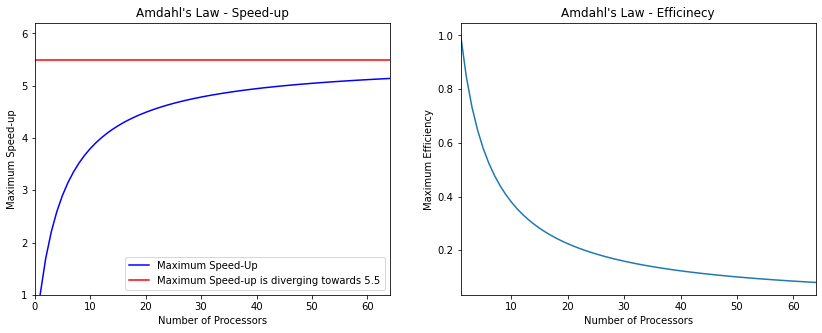

In [20]:
%run ./graphs/amdahl_speedup.ipynb

**Challenge:** Play around with different values for f and max_p to see how the graphic changes.
    
You will notice, that no matter what the fraction f for the non-parallelizable part is, we can never reach a maximum speed-up higher than the red boundary. 

If the number of processors is infinite, then we get the following limit [n]: <br>
>$\lim_{p \to \infty} \frac{1}{f+\frac{(1-f)}{p}} = \frac{1}{f}$ 

**Conclusion:** The conclusion we can draw from this is, that no matter how powerful our machine is, the speed-up will never be more than $\frac{1}{f}$. This can be considered the 'bottleneck' of parallel computing. 

**Limitations of Amdahl' Law**:  
- Amdahl's Law does not give us any information about what happens, if we vary the problem size. Do you remeber the graphic we calculated in the section about overhead? There we saw, that the problem size has an influence on speed-up. The larger the list of random numbers to be sorted by quicksort, the more speed-up could we observe (while keeping the thread number constant). Amdahl's law fails to look into the effects of varying problem sizes. 
- Amdahl's Law assumes that all parallel regions use the same amount of threads. In practice this is not always the case. Each parallel region might have a different amount of threads. Another common scenario is to have a loop, and a different amount of threads for each run of the loop. The upper-bound for speed-up calculated with Amdahl's Law is still correct in these cases, because we only give an 'upper-bound'. Howeer, we could give a more precise upper-bound by adjusting the formula of Amdahl's Law so that it considers different amount of threads for different parallel regions. 
- Amdahl's Law only gives an upper bound for speed-up. It does not give an approximation for the true speed-up. The speed-up we end up measuring can vary greatly from the one that is in theory possible (if there was no parallel overhead and if all parallel regions use the same amount of threads). 
- Amdahl's Law assumes that f is fixed. In practice, however, we can observe that the ration of the parallelizable part of the program to the non-parallelizable one changes, as we change the problem size. If we want to calculate the upper-bound of speed-up for various problem sizes, Amdahl's Law is not suitable (unless we change f for each calculation).

In case you find it difficult to understand this list about limitations of Amdahl's Law, don't worry. Keep reading, and come back to it again later. It will make more sense once you learned about scalability and Gustafson's law. 

## What is the serial fraction of a program ?  <a class="anchor" id="serialfraction"></a>

Have you wondered, how you would be able to find out what fraction of the program is inherently serial? If you want to use Amdahl's Law and Gustafson's Law for calculations you need to know `f` (the serial fraction of the program). 

One way to get f is by measuring the wall time of all the program parts which you believe to be non-parallelizable, and the wall time of the parts which you believe can be parallized. Doing this will give you a rough idea about the value of f. The challenge with this approach is to get all the serial parts together, that are hiding within the parallel region. Let's say you have a code block which is executed by only one thread (e.g. OMP single), then you have to add that to the serial execution time, even if the code lies within a region that can be parallelized. 

Another way of calculating f is by using Amdahl's Law. 
We know from Amdahl's Law that if we keep the problem size fixed, and we measure the execution time with an increasing number of threads, then the maximum speed-up will diverge towards 1/f. Do you already see where this goes?

Let's say you measured the execution time of your 'mandelsort' program with different numbers of threads. Then you calculate the speed-up for each thread number and plot the result: 

<img src='figures/Mandelbrot_fullProgram.PNG' width='400' art='Mandelbrot...."'> 

**Question:** What could be an approximate value for f in the mandelbrot-set programm?

In [ ]:
%run ./topsecret/test18.ipynb

We can visually analyze what an approximate value for the maximum possible speed-up could be for an infinite number of processing units. This gives as a value for '1/f'. Calculating f is then really easy, as $\frac{1/f}{1} = f$. So all we have to do is find out the limit that the graph is diverging to, and divide that value by 1. Instead of doing the analysis visually we can also use some fancy python modules that allow us to fit a graph to a set of data points and then we can calculate the limit of that graph for an infinite number of p. 

**Challenge:** You can try this method with any of the programs in the `./programs` folder. Just open the notebook `compare_timemeasuingmethods.ipynb` in the folder `./extras` and calculate the speed-up progression for the program you are interessted in. 

You might notice two interessting things:
1. If we measure the execution time on the algorithm only instead of the full program run, it is much harder for us to guess what the maximum possible speed-up for an infinte number of threads could be. 
2. The speed-up progression is most of the time not monotoniously increasing. Instead it often drops again with a higher number of threads. 

The speed-up progression for the Mandelbrot-set Program in the picture above is based on measurements made on the full programm run. How does the graphic look if we measure execution time on the algorithm only? Here is the graphic:

<img src='figures/Mandelbrot_algorithmOnly.PNG' width='400' art='Mandelbrot...."'> 

It looks like we get a linear speed-up progression, but Amdahl's Law has tought us that this is not possible if the problem size is fixed. The reason why we don't see a logarithmic curve is that we don't have enough threads available. If we had a more powerful machine that allows us to use more than 64 threads, we would eventually notice a logaritimic curve pattern (if the number of threads is high enough). Because the fraction of the inherently serial part of the program is much smaller if we measure the execution time on the algoirthm only, we can achieve much higher speed-ups. Further, it takes a higher amount of threads until we can see the curve flattening. You can test this out yourself if you go to the section of Amdahl's Law. There you see some code with which you can create the graph of Amdahl's Law with different values for f. 

The second observation is that when we actually measure the execution time of our program with different thread numbers, and plot the results, we might get very different results than what Amdahl's Law would make us believe we should get. The reason for this is parallel overhead. Amdahl's Law does not account for any parallel overhead, which is why we only get a 'upper bound' for speed-up. The actual speed-up however can vary greatly from the upper bound of speed-up calculated with Amdahl's Law. If the parallel overhead is a constant value for any thread number, then we get a curve that resembles the curve we can calculate with Amdahl's Law. Anyhow, most of the time the parallel overhead is not a constant value, but grows as the number of threads grows. 

We can see this for example if we calculate the speed-up and efficiency progression for the 'bubblesort' program:

<img src='figures/bubblesort_performance.png' width='800' art='Bubblesort...."'> 

If we use more than 32 threads in the bubblesort program our speed-up decreases! This is because the parallel overhead increases if we use more threads. We have to be careful not to confuse the true speed-up with the speed-up that would in theory be possible if there was no parallel overhead. 

Yet another possible method to calculate f is with one or multiple speed-up measurements. With Amdahl's Law we can calculate an upper bound for speed-up: $\frac{1}{f+\frac{(1-f)}{p}}$. If we isolate f, we get $f = \frac{p - s}{s \cdot (p-1)}$ with s=upper bound for speed-up.

Does this mean we can just do any measurement for speed-up, plug it into the formula just mentioned, and get f? 
This will not work because of two reasons:
1. Random Noise: If we calculate f with the formula above with different measurements, we will always get a different value for f. 
2. Difference between upper-bound and true speed-up: By now you should know that Amdahl's Law gives us only an upper bound for speed-up, not the actual speed-up. The method just mentined would work fine if you knew the upper bound for speed-up. But you don't. You only know the true speed-up. Therefore, the f you calculate with this method is not the true f. The upper bound for speed-up for a certain thread number is higher than the actual speed-up you measured. Therefor, the true f is smaller than the f you end up calculating, when you plug the 'measured speed-up' into the formula above. 

**Conclution:** There is not one satisfying method to calculate f. Depending on the program one or the other method will be most suitable. Another thing to consider is that no matter what method you choose to calculate f, the result will only be an approximation to the true value of f [[o]](#o).

## Scalability <a class="anchor" id="scalability"></a>

In the context of computer science the term "scalability or scaling" is generally used to indicate the "ability of hardware and software to deliver greater computational power when the amount of resources is increased" [[o]](#o). When we increase the number of threads in our program and as a result we observe an increase in speed-up, then we can say that our program scales. Now, we maybe want to give a more detailed report by explaining 'how' our program scales. That's where it can get a little tricky, as you will see...

In the context of parallel programming and performance you will often hear the terms "weakly scalable" and "strongly scalable". This can be quite confusing, because scientist also talk about programs that are "poorly scalable" and "highly scalable" [[j]](#j), which sounds like it should be the same, but isn't. 

Strong and weak scalability refer to two different types of scaling:

**Strong Scalability - Strong Scaling:**
If we increase the number of processors, but keep the problem size fixed, then we analyze strong scalability. For example you could measure speed-up of a 'matrix-matrix mulitplication' with different numbers of threads, while keeping the matrix size constant at a certain size (i.e. 64). We ask the question: "How does speed-up/efficiency change, if I increase the number of threads while keeping the problem size constant?"

**Weak Scalability - Weak Scaling:** 
If we increase the problem size at a consistent rate, and at the same time we increase the number of threads at a consistent rate, then we analyze weak scalability. For example you could first measure the speed-up of a 'matrix-matrix multiplication' with 8 threads and matrix size 8, then with 16 threads and matrix size 16, then with 32 threads and matrix size 32, ... We ask the question: How does speed-up/efficiency change, if I increase the number of threads, and simmultaniously increase the problem size?

Do you remember what we mean with problem size? I give you a few examples. If you have a sorting algorithm, the problem size is the length of the list to be sorted. If you want to calculate the Mandelbrot Set, the problem size is the height or width or number of pixels of the picture you want to create. In the programs you can find in the `./programs` section, I have adjusted all the code so that the last argument that is passed to the program is the problem size. This allows us to play around with different problem sizes and investigate how that influences speed-up. 

**Question:** Do we analyze weak or strong scalability with Amdahl's law?

In [6]:
%run ./topsecret/test16.ipynb


Type "weak" or "strong": 



 awoei


No valid answer. Type "weak" or "strong"


What about "poorly scalable" and "highly scalable"? Intuitively it would make sense, if poorly scalable is a synonim of weakly scalable, and highly scalable a synonim for strongy scalable. Be careful, because it is not. Instead, the terms "poorly scalable" and "highly scalable" are used with respect to different degrees of scalability.

No matter whether you analyze weak or strong scalability like we have just defined it, a program can scale or not scale. If you calculate the speed-up with an increasing number of threads (keeping the problem size the same) and you don't observe an increase in speed-up, then you can conclude that the program does not scale. On the other hand, you could observe a small increase in speed-up, which you might describe as poor scaling. In the best case scenario you observe an almost linear speed-up, which means that you got almost no parallel overhead. Then you can say that the program is highly scalable. 

The same kind of scaling description you can give when you do weak scaling (increasing problem size and thread number simultaniously). Regardless of whether you analyze strong scaling or weak scaling; in both cases you can end up with a program that does not scale at all, scales poorly, highly or something in between.  

I hope everything makes sense to you until now. Now we get to the part that is confusing. Try not to get confused.

**When do we call a program strongly scalable or weakly scalable?** 

<blockquote>"If when we increase the number of processes/threads, we can keep the efficiency fixed without increasing the
problem size, the program is said to be strongly scalable. If we can keep the efficiency
fixed by increasing the problem size at the same rate as we increase the number of
processes/threads, then the program is said to be weakly scalable [a]." </blockquote>

**Let's say you analyse a program for "strong scalability"**. According to the above definition you can only say that your program "scales strongly", if the efficiency remains the same, despite increasing the thread number. Even though you analyze a program for strong scalability, most likely you will come to the conclusion that the program does not "scale strongly". That is, because you always have a part of the program which is inherently serial. Amdahl's Law has shown us, that speed-up cannot be linear but diverges towards 1/f instead. Therefore the efficiency will never remain fixed (compare with the graphic we calculated in the previous section about efficiency). What this indicates is, that a program can never achieve "strong scalability". 
Anyhow, this does not mean that the program does not "scale". Remember the general definition I gave you about "scalability"? In the context of computer science the term "scalability or scaling" is generally used to indicate the "ability of hardware and software to deliver greater computational power when the amount of resources is increased" [[o]](#o). As long as we see an increase in speed-up when increasing thread number, our program still scales. But be careful, you can't say that it "scales weakly", because that would imply that you analysed the program for "weak scalability". 

**Now let's look at a different scenario, where you analyze your program for "weak scalability"**. How to do that you will learn in the next section about Gustafson's Law. Here it is definitely possible to come to the conclusion that the program "scales weakly". I will demonstrate this to you in the next section. Anyhow, when we say that a program "scales weakly", it does by no means indicates poor scalability. According to [[j]](#j) a program that achieves "weak scalability" scales "poorly", if we have to increase the problem size exponentially in order to maintain the efficiency fixed. On the other hand, if we have a program where we only need to increase the problem size with a linear function in order to maintain the efficiency fixed, then we have a program with "weak scalability" that scales "highly". Thus the degree of scalability depends on how much we have to increase the problem size, in order to maintain the efficiency constant.

Wow. This was a lot of theory all at once. It is time that we try out what we just learned and do some experiments.

## Gustafson's Law <a class="anchor" id="gustafson"></a>

Amdahl's law does not consider any change in problem size, but keeps it fixed instead. What we can observe in real life, however, is a general trend for the problem size of applications to adjusts to the hardware capacities. An obvious example for this is the gaming industry. The computer games that are developed nowadays leverage hardware to its maximum, and would often run poorly on hardware that was developed 5 years ago, and not work at all on hardware that was developed 10 years ago. This can be observed not only with computer games, but with a wide range of applications [[n]](#n). As the hardware becomes more powerful, the programs we develop to run on that hardware is designed to handle bigger problem sizes. 

It is this observation that has let Gustafson to the following suggestion:

<blockquote>". . . speedup should be measured by scaling the problem to the number of processors, not by fixing the problem size" <sub>Gustafson 1988, cited in [n]</sub> </blockquote> 
    
Gustafson's Law gives us a formula for calculating the 'scaled speed-up'. That is the speed-up we achieve if we increase the problem size at the same rate as we increase the number of processors.
The deriviation of the formula for scaled speed-up might take same time to understand. If you your eyes don't start shining when you hear the word 'mathematics', then just skip all the calculations and go straight to the final formula which is Gustafson's Law. The final formula for scaled speed-up is in fact super simple. Understanding how to get to that formula is the more challenging part. 
    
In the section about Amdahl's law we learned, that a program can be divided into two parts: 
1. the part that is inherently serial
2. the part that is paralellizable
    
The fraction of the first part we call f, and the fraction of the second part we call 1-f. 

**Question:** What happens to the value of f (the fraction of the inherently serial part of the program) if we increase the problem size? Does it stay the same? Does it get smaller? Does it get bigger?

In [4]:
%run ./topsecret/test17.ipynb


Type "same","smaller","bigger": 



 lij



Answer not valid. Type "same","smaller" or "bigger"


When we increase the problem size we can usually observe, that the execution time of the parllelizable part of the program increases much more than the execution time of the inherently serial part of the program. Because of this, the value for f changes, if we change the problem size! As the problem size increases, f decreases. How much exactly will depend on the program. 

We define:
- $\alpha$ = "scaling function of the part of the program that does not benefit from parallelization with respect to the complexity of the problem size" [[m]](#m)
- $\beta$ = "scaling function of the part of the program that benefits from parallelization with respect to the complexity of the problem size" [[m]](#m)

The scaling functions $\alpha$ and $\beta$ take as input the problem size, and return the factor by which the inherently serial part and parallelizable part decrease/increase.

With the use of $\alpha$ and $\beta$ we can give a more generalized calculation of the serial execution time, which accounts for different problem sizes[[m]](#m):
<blockquote> $T_{\alpha \beta}(1) = \alpha \cdot t_{ser} + \beta \cdot t_{par} = \alpha \cdot f \cdot T(1) + \beta \cdot (1-f) \cdot T(1)$ </blockquote>

This is how you can calculate the execution time of a program that does not apply parallelism (number of processors is set to 1), but has various problem sizes. The problem size will be the input of the scaling functions $\alpha$ and $\beta$. The output of these functions will determine the factor by which the execution time of the two program parts have to increase, in order to account for the in increased problem size. 

**Question:** How would you adjust this formula, in order to calculate the execution time of a parallized program using p processors?

Just like we did in the section about Amdahl's Law, we can divide the execution time of the parallizable part by p, which gives us a lower bound for the execution time of that part of the program. The lower bound is there because of the additional overhead due to parallelism. This is why we now have a 'bigger-equal' sign instead of the 'eqal' sign we used in the formula above. We get the following formula for calculating the execution time of a program, in dependence of problem size and the number of processors used:

<blockquote> $T_{\alpha \beta}(p) >= \alpha \cdot t_{ser} + \frac{\beta \cdot t_{par}}{p} = \alpha \cdot f \cdot T(1) + \frac{\beta \cdot (1-f) \cdot T(1)}{p}$ </blockquote>

**Question:** How would you calculate speed-up with that formula ?

Dividing $T_{\alpha \beta}(1)$ by $T_{\alpha \beta}(p)$ gives us a scaled upper bound for speed-up [[m]](#m):

<blockquote> Speed-up$_{\alpha \beta}(p) = \frac{T_{\alpha \beta}(1)}{T_{\alpha \beta}(p)} <= \frac{\alpha \cdot t_{ser} + \beta \cdot t_{par}}{\alpha \cdot t_{ser} + \frac{\beta \cdot t_{par}}{p}} = \frac{ \alpha \cdot f \cdot T(1) + \beta \cdot (1-f) \cdot T(1)}{\alpha \cdot f \cdot T(1) + \frac{\beta \cdot (1-f) \cdot T(1)}{p}} = 
\frac{\alpha \cdot f + \beta \cdot (1-f)}{\alpha \cdot f+\frac{\beta \cdot (1-f)}{p}}$</blockquote>

We can simplify this formula a little bit. Instead of using two separate scaling functions $\alpha$ and $\beta$ we can can just look at the ration of the two. This makes sense, because at the end we are only interessted in the ratio. We want to know how much faster the parallelizable part of the program grows compared to the part that is inherently serial. Thus, we define [[m]](#m):

<blockquote>$\gamma = \frac{\alpha}{\beta}$ </blockquote>

and the according function for the scaled upper bound of speed-up is:

<blockquote> Speed-up$_{\gamma}(p) <= \frac{f + \gamma \cdot (1-f)}{f+\frac{\gamma \cdot (1-f)}{p}}$</blockquote>

Wow, that was a lot of work! But what about Gustafson't Law? Isn't that what we are talking about? Be patient, we are almost there...

The value for $\gamma$ can either be [[m]](#m):
- $\gamma = 1$ (i.e. $\alpha=\beta$) → Amdahl's Law
- $\gamma = p$ (i.e. $\alpha=1$ and $\beta=p$) → Gustafson's Law
- $\gamma = $ any other function depending on p

In the first case of $\gamma = 1$ we end up with Amdahl's Law. Just test it. Replace $\gamma$ with 1 in the formula above and you end up with the formula for 'upper-bound speed-up' like we defined it in the section about Amdahl's Law. Thus, if you analyze your program for 'weak scalability' and you notice that $\alpha=\beta$, then that means that you have the exact same restrictions on speed-up that apply to Amdahl's Law.

The second case where $\gamma = p$ is where Gustafson's Law can be used. If  $\gamma = p$ then we can simplify the formula for upper-bound scaled speed-up even more. We replace $\gamma$ with p, and end up with Gustafson's Law [[m]](#m):

**Gustafson's Law:** <blockquote> Scaled Speed-up(p) $ <= \frac{f + p \cdot (1-f)}{f+\frac{p \cdot (1-f)}{p}} = f + p \cdot (1-f) $</blockquote>

and the efficency in the case of Gustafson's Law:

<blockquote> Efficiency(p) $ <= \frac{f + p \cdot (1-f)}{p} = \frac{f}{p} + (1-f) $</blockquote>

Gustafson's Law only holds true, if $\gamma = p$. What if that is not the case? Well, no one is going to stop us from using Gustafson's law nevertheless, but the calculated result for scaled speedup will not reflect reality. 

So, the challenge is to find a function $\gamma$ which returns p. Many people think that if they increase the problem size at the same rate as they increase p, then Gustafson's law can be used. Be careful, this is not necesarily the case. Instead, you need to increase the problem size in a manner, so that the execution time of the parallelizable part increases at rate p (assuming that the the serial part remains unaffected by an increase of the problem size). If you know at what rate to increase the problem size so that $\gamma = p$, then you can apply Gustafson's Law to calculate a scaled upper bound for speed-up. 

Just like we did with Amdahl's Law, we can calculate the progression of scaled upper bound for speed-up using Gustafson's Law:

In [1]:
# parameters for you to adjust
f_1 = 0.2
f_2 = 0.1
f_3 = 0.05
max_p = 128

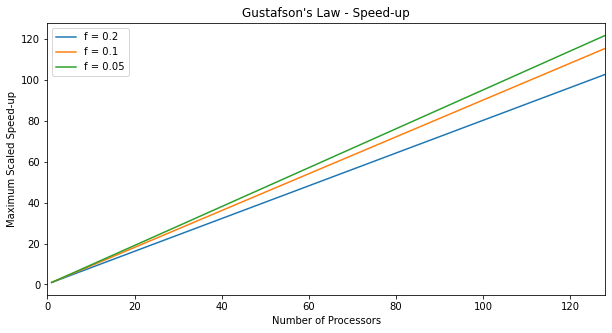

In [3]:
%run ./graphs/gustafson_speedup.ipynb

**Challenge:** Adjust the values for f in the code above to see how this chages the graphic.

Keep in mind, that with Gustafson's Law we assume that the problem size is increased correspondently to the number of processors. That is the reason why see a linear speed-up progression with Gustafon's Law.

**Question:** What speed up can you in theory achieve, if you have an infinite amount of processors ? 

In [25]:
%run ./topsecret/test19.ipynb


Choose one of the following options: "zero","1/f","f","p","infinite"



 zero



Sorry, that is wrong.


Let's also look at the efficiency that can be achieved according to Gustafson's Law:

In [8]:
# parameters for you to adjust
f_1 = 0.2
f_2 = 0.1
f_3 = 0.05
max_p = 128

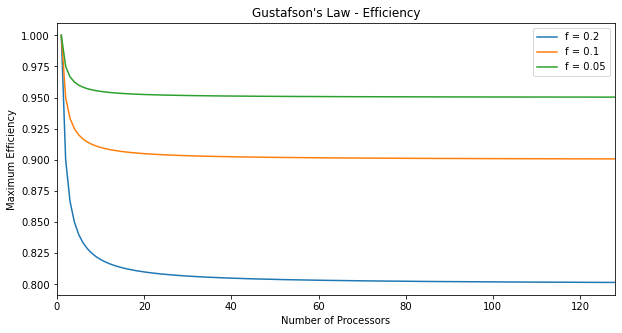

In [9]:
%run ./graphs/gustafson_efficiency.ipynb

## Summary <a class="anchor" id="summary"></a>
    
We have seen, that ...

So why would anyone choose to use Amdahl's Law, if we can in theory achieve an infinite speed-up by using Gustafson's Law?

## References <a class="anchor" id="references"></a>

[a] An introduction to parallel prgoramming. Peter Pachecco 2011.<a class="anchor" id="a"></a>

[b] Introduction to Parallel Computing. From Algorithms to Programming on State-of-the-Art Platforms (2018) page 11? <a class="anchor" id="b"></a>

[c] Time Mattson. Youtube Video "Introduction to OpenMP: 02 part 1 Module 1"  https://youtu.be/cMWGeJyrc9w <a class="anchor" id="c"></a>

[d] Depicable Me. Youtube Video. "Minions - WHAT ?!" https://www.youtube.com/watch?v=MfylJy_nMbM <a class="anchor" id="d"></a>

[e] Python Cookbook <a class="anchor" id="e"></a>

[f] Misleading Performance Reporting in the Supercomputing Field, David H. Bailey <a class="anchor" id="f"></a>

[g] Python Documentation. Timeit Module. https://docs.python.org/3/library/timeit.html <a class="anchor" id="g"></a>

[h] Documentation about magic commands. https://ipython.readthedocs.io/en/stable/interactive/magics.html <a class="anchor" id="h"></a>

[i] Masterkurs Parallele und verteilte Systeme.  <a class="anchor" id="i"></a>

[j] introduction to parallel computing - from algorithm... <a class="anchor" id="j"></a>

[k] patterns for parallel programming by tim mattson <a class="anchor" id="k"></a>

[l] Picture of Gene Amdahl. https://cioperu.pe/fotoreportaje/15674/la-generalmente-interesante-historia-del-mainframe-de-ibm/?foto=5 <a class="anchor" id="l"></a>

[m] Parallel Programming - Concepts and practice...  <a class="anchor" id="m"></a>

[n] Parallel Programming - Patterns for efficent com.... <a class="anchor" id="n"></a>

[o] Scalability: strong and ... https://www.kth.se/blogs/pdc/2018/11/scalability-strong-and-weak-scaling/ <a class="anchor" id="o"></a>